In [2]:
# Cell 1: Import necessary libraries
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [3]:
# Cell 2: Load the preprocessed data
train_data = np.load('/kaggle/input/distracted-driver/train_statefarm_images.npz')
test_data = np.load('/kaggle/input/distracted-driver/test_statefarm_images.npz')

train_set = train_data['X']
train_targets = train_data['y']
test_set = test_data['X']
test_targets = test_data['y']

print("Train set: ", train_set.shape)
print("Test set: ", test_set.shape)
print("Train targets: ", train_targets.shape)
print("Test targets: ", test_targets.shape)

Train set:  (17939, 64, 64, 3)
Test set:  (4485, 64, 64, 3)
Train targets:  (17939,)
Test targets:  (4485,)


In [4]:
# Cell 3: Flatten the images for Random Forest
# Random Forest expects 2D input (samples, features)
X_train = train_set.reshape(train_set.shape[0], -1)
X_test = test_set.reshape(test_set.shape[0], -1)
y_train = train_targets
y_test = test_targets

print("\nFlattened Train set: ", X_train.shape)
print("Flattened Test set: ", X_test.shape)
print(f"Total features per sample: {X_train.shape[1]}")



Flattened Train set:  (17939, 12288)
Flattened Test set:  (4485, 12288)
Total features per sample: 12288


In [5]:
# Cell 5: Initialize Random Forest Classifier
# You can adjust these hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=20,            # Maximum depth of the tree
    min_samples_split=10,    # Minimum samples required to split a node
    min_samples_leaf=4,      # Minimum samples required at leaf node
    max_features='sqrt',     # Number of features to consider at each split
    n_jobs=-1,               # Use all available processors
    random_state=42,
    verbose=1
)

print("Random Forest model initialized")
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Max depth: {rf_model.max_depth}")

Random Forest model initialized
Number of trees: 100
Max depth: 20


In [6]:
# Cell 6: Train the Random Forest model
print("\nTraining Random Forest model...")
start_time = time()

rf_model.fit(X_train, y_train)

training_time = time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")



Training Random Forest model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.7s



Training completed in 50.44 seconds (0.84 minutes)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.0s finished


In [7]:
# Cell 7: Make predictions on train and test sets
print("\nMaking predictions...")
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Making predictions...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished



Train Accuracy: 0.9991 (99.91%)
Test Accuracy: 0.0986 (9.86%)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [8]:
# Cell 8: Detailed classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT - TEST SET")
print("="*60)
print(classification_report(y_test, y_test_pred, 
                          target_names=[f'Class {i}' for i in range(10)]))


CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         0
     Class 1       0.00      0.00      0.00         0
     Class 2       0.00      0.00      0.00         0
     Class 3       0.00      0.00      0.00         0
     Class 4       0.00      0.00      0.00         0
     Class 5       0.00      0.00      0.00         0
     Class 6       0.00      0.00      0.00         0
     Class 7       0.69      0.99      0.82       445
     Class 8       0.00      0.00      0.00      1911
     Class 9       0.00      0.00      0.00      2129

    accuracy                           0.10      4485
   macro avg       0.07      0.10      0.08      4485
weighted avg       0.07      0.10      0.08      4485



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [9]:
# Cell 13: Train an improved Random Forest with better regularization
print("\n" + "="*60)
print("TRAINING IMPROVED RANDOM FOREST MODEL")
print("="*60)

# Initialize with more conservative hyperparameters
rf_improved = RandomForestClassifier(
    n_estimators=200,           # More trees for better ensemble
    max_depth=10,                # Much shallower to prevent overfitting
    min_samples_split=50,        # Need more samples to split
    min_samples_leaf=20,         # Need more samples at leaves
    max_features='sqrt',         # Still use sqrt of features
    max_samples=0.8,             # Use only 80% of data per tree (bootstrap)
    class_weight='balanced',     # Handle class imbalance!
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nImproved model parameters:")
print(f"- Trees: {rf_improved.n_estimators}")
print(f"- Max depth: {rf_improved.max_depth} (reduced from 20)")
print(f"- Min samples split: {rf_improved.min_samples_split} (increased from 10)")
print(f"- Min samples leaf: {rf_improved.min_samples_leaf} (increased from 4)")
print(f"- Class weighting: balanced")

# Train the improved model
print("\nTraining improved model...")
start_time = time()
rf_improved.fit(X_train, y_train)
training_time_improved = time() - start_time

# Make predictions
y_train_pred_improved = rf_improved.predict(X_train)
y_test_pred_improved = rf_improved.predict(X_test)

# Calculate accuracies
train_acc_improved = accuracy_score(y_train, y_train_pred_improved)
test_acc_improved = accuracy_score(y_test, y_test_pred_improved)

print(f"\nImproved Model Results:")
print(f"Training time: {training_time_improved:.2f} seconds")
print(f"Train Accuracy: {train_acc_improved:.4f} ({train_acc_improved*100:.2f}%)")
print(f"Test Accuracy: {test_acc_improved:.4f} ({test_acc_improved*100:.2f}%)")
print(f"Overfitting gap: {(train_acc_improved-test_acc_improved)*100:.2f}%")

print("\n" + "="*60)
print("COMPARISON: Original vs Improved")
print("="*60)
print(f"{'Metric':<25} {'Original':<15} {'Improved':<15}")
print("-"*60)
print(f"{'Train Accuracy':<25} {train_accuracy*100:>6.2f}%        {train_acc_improved*100:>6.2f}%")
print(f"{'Test Accuracy':<25} {test_accuracy*100:>6.2f}%        {test_acc_improved*100:>6.2f}%")
print(f"{'Overfitting Gap':<25} {(train_accuracy-test_accuracy)*100:>6.2f}%        {(train_acc_improved-test_acc_improved)*100:>6.2f}%")
print("="*60)


TRAINING IMPROVED RANDOM FOREST MODEL

Improved model parameters:
- Trees: 200
- Max depth: 10 (reduced from 20)
- Min samples split: 50 (increased from 10)
- Min samples leaf: 20 (increased from 4)
- Class weighting: balanced

Training improved model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   47.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s



Improved Model Results:
Training time: 48.56 seconds
Train Accuracy: 0.8746 (87.46%)
Test Accuracy: 0.0863 (8.63%)
Overfitting gap: 78.83%

COMPARISON: Original vs Improved
Metric                    Original        Improved       
------------------------------------------------------------
Train Accuracy             99.91%         87.46%
Test Accuracy               9.86%          8.63%
Overfitting Gap            90.06%         78.83%


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


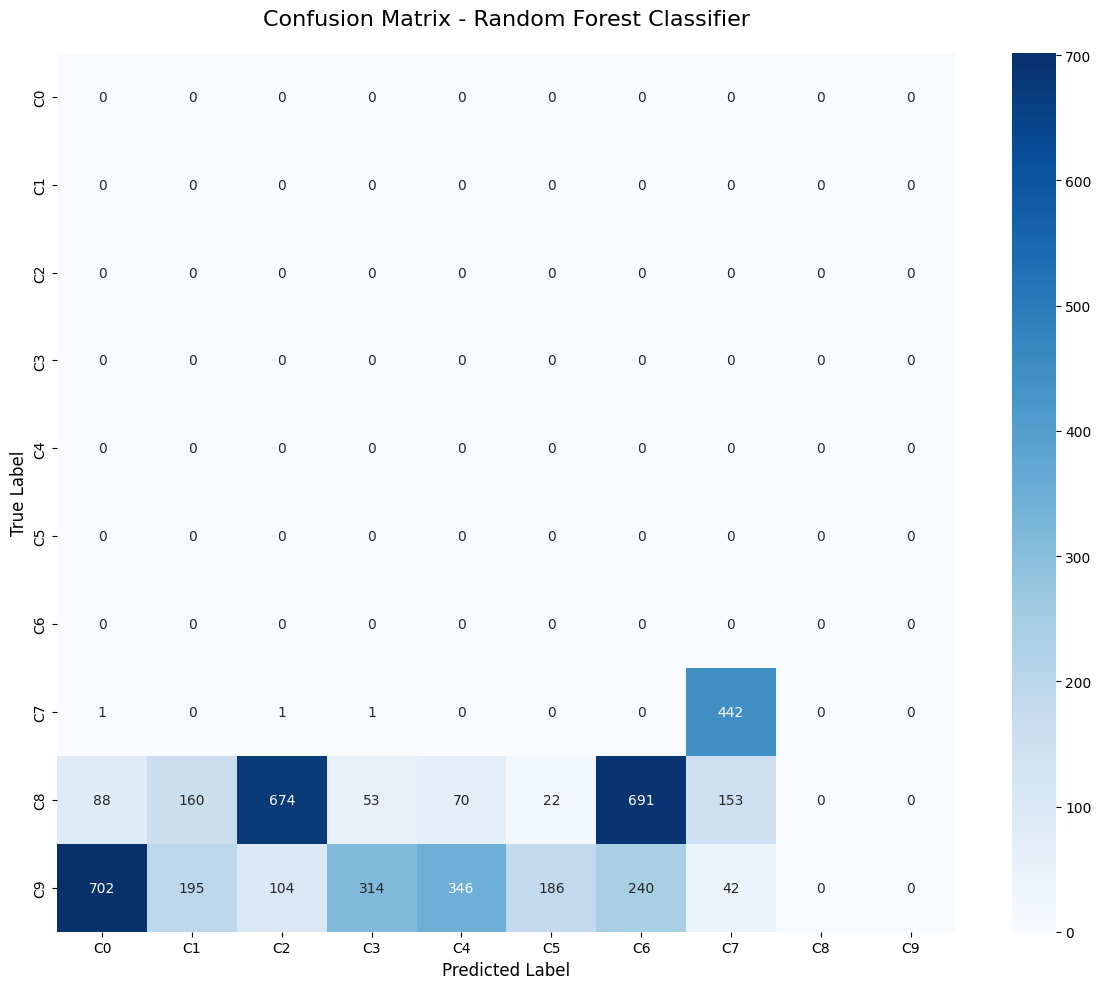


Per-class accuracy:
Class 0: 0.0000 (0.00%)
Class 1: 0.0000 (0.00%)
Class 2: 0.0000 (0.00%)
Class 3: 0.0000 (0.00%)
Class 4: 0.0000 (0.00%)
Class 5: 0.0000 (0.00%)
Class 6: 0.0000 (0.00%)
Class 7: 0.9933 (99.33%)
Class 8: 0.0000 (0.00%)
Class 9: 0.0000 (0.00%)


In [10]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'C{i}' for i in range(10)],
            yticklabels=[f'C{i}' for i in range(10)])
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=16, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
print("\nPer-class accuracy:")
for i in range(10):
    class_accuracy = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
    print(f"Class {i}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")


Analyzing feature importance...


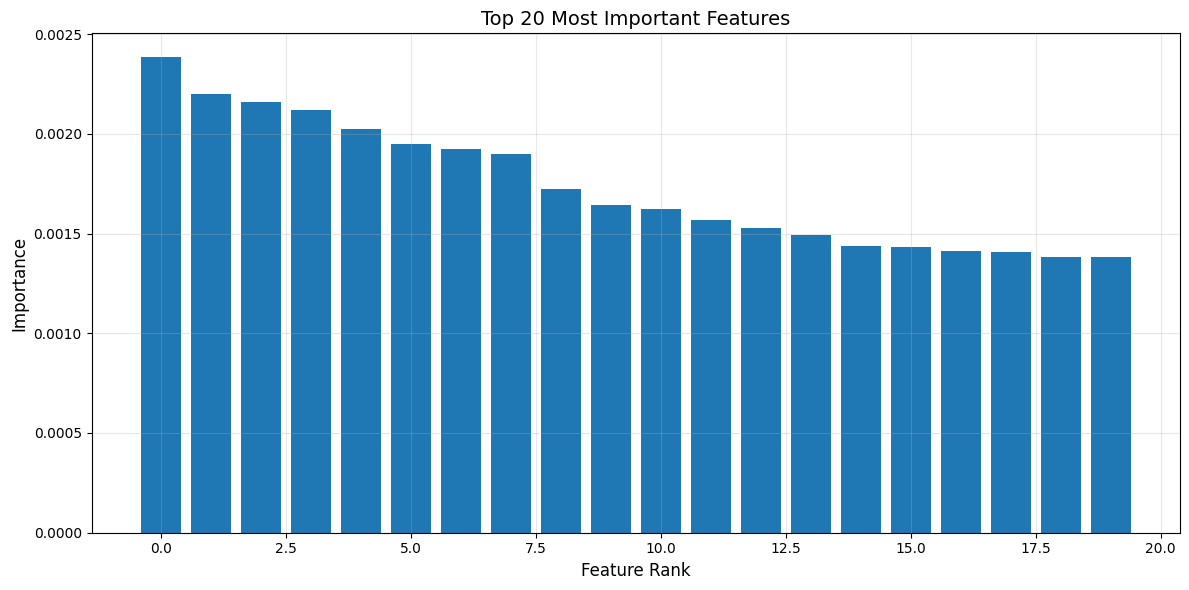


Mean feature importance: 0.000081
Max feature importance: 0.002385


In [11]:
# Cell 10: Feature importance analysis (top features)
print("\nAnalyzing feature importance...")
feature_importance = rf_model.feature_importances_

# Get top 20 most important features
top_indices = np.argsort(feature_importance)[-20:][::-1]
top_importance = feature_importance[top_indices]

# Convert flat indices back to image coordinates
img_shape = (64, 64, 3)
top_coords = []
for idx in top_indices:
    pixel_idx = idx // 3
    channel = idx % 3
    row = pixel_idx // 64
    col = pixel_idx % 64
    top_coords.append((row, col, channel))

plt.figure(figsize=(12, 6))
plt.bar(range(20), top_importance)
plt.title('Top 20 Most Important Features', fontsize=14)
plt.xlabel('Feature Rank', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMean feature importance: {feature_importance.mean():.6f}")
print(f"Max feature importance: {feature_importance.max():.6f}")

In [12]:
# Cell 12: Optional - Save the trained model
import pickle

# Save the model
model_filename = 'random_forest_driver_detection.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"\nModel saved as '{model_filename}'")


Model saved as 'random_forest_driver_detection.pkl'
